___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_female=pd.read_csv("ANSUR II FEMALE Public.csv")

In [3]:
df_male=pd.read_csv("ANSUR II MALE Public.csv", encoding='latin-1')

## Explore Data

In [4]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [5]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [6]:
df_female.rename(columns= {"SubjectId": "subjectid"}, inplace= True)

In [7]:
df_female.head(1)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand


In [8]:
df_female.shape

(1986, 108)

In [9]:
df_male.shape

(4082, 108)

In [10]:
df = pd.concat([df_male, df_female], axis=0, ignore_index=True)

In [11]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [12]:
df.info(max_cols=109)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       6068 non-null   int64 
 1    abdominalextensiondepthsitting  6068 non-null   int64 
 2    acromialheight                  6068 non-null   int64 
 3    acromionradialelength           6068 non-null   int64 
 4    anklecircumference              6068 non-null   int64 
 5    axillaheight                    6068 non-null   int64 
 6    balloffootcircumference         6068 non-null   int64 
 7    balloffootlength                6068 non-null   int64 
 8    biacromialbreadth               6068 non-null   int64 
 9    bicepscircumferenceflexed       6068 non-null   int64 
 10   bicristalbreadth                6068 non-null   int64 
 11   bideltoidbreadth                6068 non-null   int64 
 12   bimalleolarbreadth              

In [13]:
df.isnull().sum().any()

True

In [14]:
drop_list = []
for i in df:
    if df[i].isnull().sum() > 0:
        drop_list.append(i)
drop_list        

['Ethnicity']

In [15]:
df.duplicated().sum()

0

In [16]:
df["Ethnicity"].isnull().sum()

4647

In [17]:
for i in df.select_dtypes("object"):
    print(f"{i} has {df[i].nunique()} uinqe value")    

Gender has 2 uinqe value
Date has 253 uinqe value
Installation has 12 uinqe value
Component has 3 uinqe value
Branch has 3 uinqe value
PrimaryMOS has 285 uinqe value
SubjectsBirthLocation has 152 uinqe value
Ethnicity has 209 uinqe value
WritingPreference has 3 uinqe value


In [18]:
# focus on BirthLocation, PrimaryMOS 
df["PrimaryMOS"].value_counts() # drop it

11B     671
88M     320
92A     288
91B     230
68W     222
       ... 
15D       1
25G       1
915E      1
19B       1
76B       1
Name: PrimaryMOS, Length: 285, dtype: int64

In [19]:
df["SubjectsBirthLocation"].value_counts()

California       446
New York         420
Texas            397
Indiana          266
Oklahoma         221
                ... 
Ivory Coast        1
Belarus            1
New Zealand        1
South America      1
Denmark            1
Name: SubjectsBirthLocation, Length: 152, dtype: int64

In [20]:
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}


In [21]:
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}


In [22]:
df["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
df["SubjectsBirthLocation"].value_counts()

California              446
New York                420
Texas                   397
Indiana                 266
North America           265
Oklahoma                221
Illinois                216
Florida                 210
Minnesota               200
Michigan                196
Mississippi             194
Georgia                 170
Alabama                 164
South Carolina          161
North Carolina          149
Europe                  149
Asia                    144
Ohio                    142
Louisiana               137
Pennsylvania            132
Virginia                118
Massachusetts           112
Wisconsin               102
New Jersey               89
Missouri                 84
Arizona                  84
Colorado                 81
Maryland                 80
Tennessee                74
Kentucky                 69
Washington               66
Kansas                   63
South Dakota             56
Iowa                     55
Arkansas                 54
South America       

In [23]:
df["SubjectsBirthLocation"].nunique()

57

In [24]:
drop_list = ["Ethnicity", "Date", "Installation", "Component", "Branch", "PrimaryMOS", "Weightlbs", "Heightin"
             , "subjectid", "SubjectNumericRace" ]

df.drop(columns= drop_list, inplace= True )

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  6068 non-null   int64 
 1   acromialheight                  6068 non-null   int64 
 2   acromionradialelength           6068 non-null   int64 
 3   anklecircumference              6068 non-null   int64 
 4   axillaheight                    6068 non-null   int64 
 5   balloffootcircumference         6068 non-null   int64 
 6   balloffootlength                6068 non-null   int64 
 7   biacromialbreadth               6068 non-null   int64 
 8   bicepscircumferenceflexed       6068 non-null   int64 
 9   bicristalbreadth                6068 non-null   int64 
 10  bideltoidbreadth                6068 non-null   int64 
 11  bimalleolarbreadth              6068 non-null   int64 
 12  bitragionchinarc                6068 non-null   

In [26]:
df['Gender'].value_counts()

Male      4082
Female    1986
Name: Gender, dtype: int64

In [27]:
 df['WritingPreference'].value_counts() 

Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: WritingPreference, dtype: int64

In [28]:
 df['DODRace'].value_counts() 

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [29]:
df = df[df['DODRace'].isin([1,2,3])]
df['DODRace'].value_counts()     

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

<AxesSubplot:>

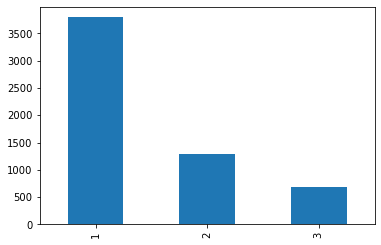

In [30]:
df["DODRace"].value_counts().plot(kind="bar")

<AxesSubplot:>

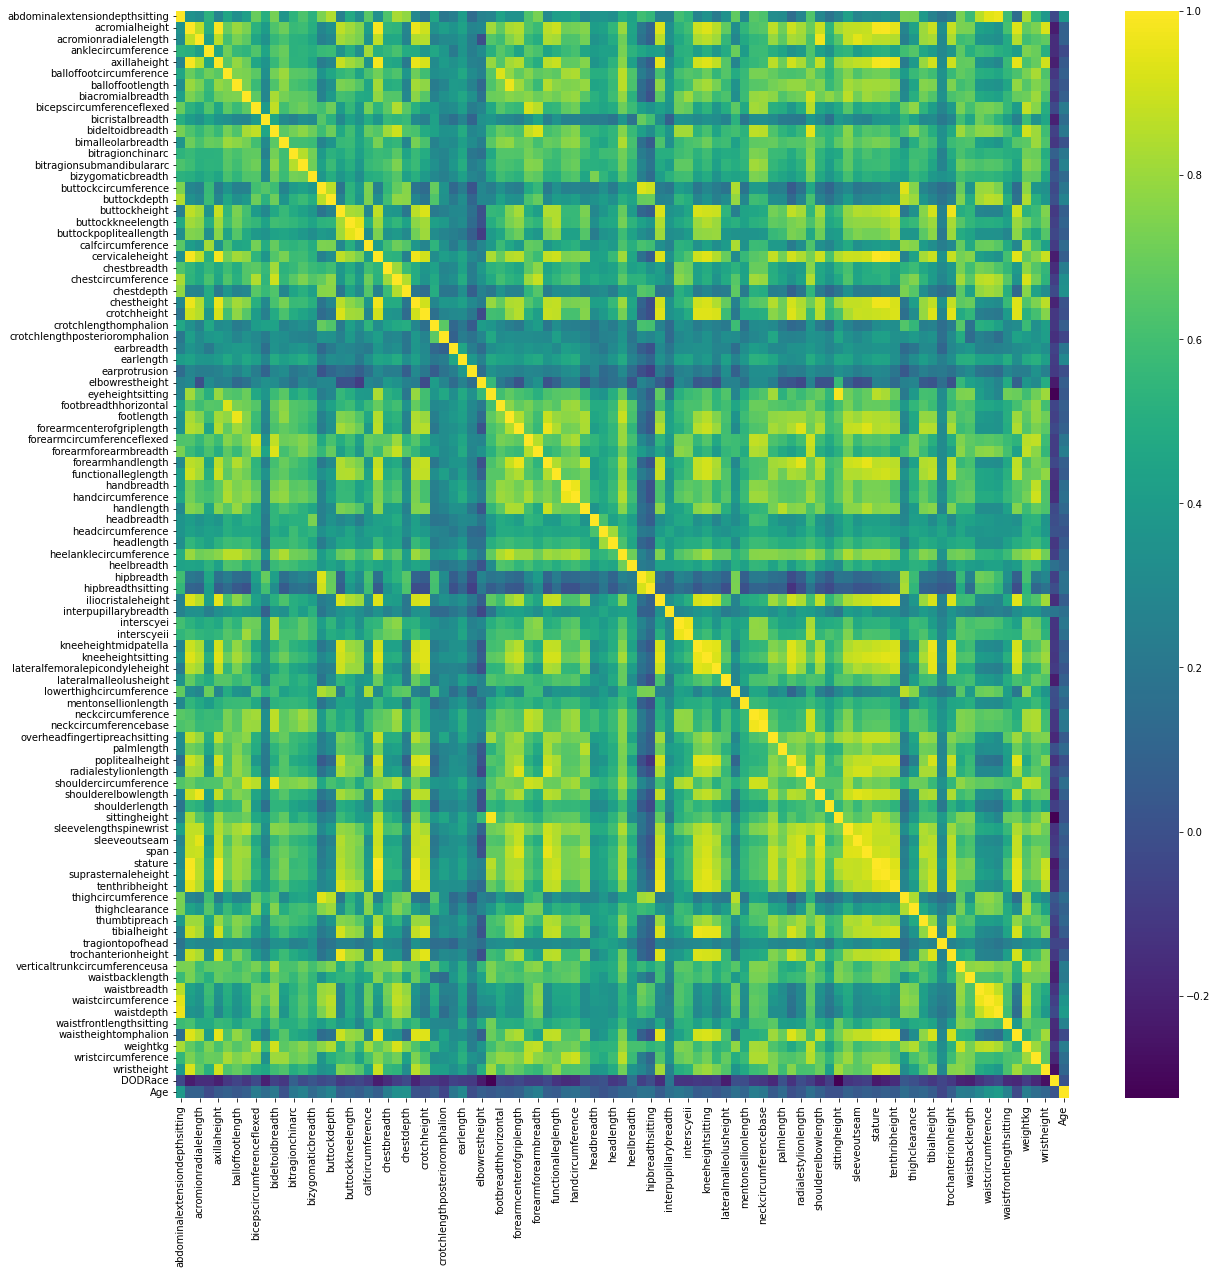

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="viridis")

<AxesSubplot:>

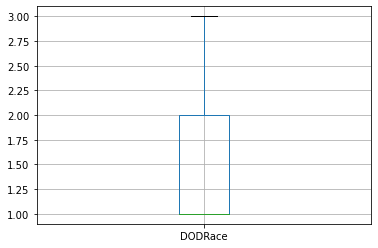

In [32]:
df.boxplot(column="DODRace")

In [33]:
df['Gender'] = df['Gender'].map({'Male': 0,'Female': 1})
df['WritingPreference'] = df['WritingPreference'].map({  'Left hand': 1, 'Right hand': 2,'Either hand (No preference)': 3})

In [34]:
df["DODRace"] = df["DODRace"].map({1 : "White", 2 : "Black", 3 : "Hispanic"})
df = df.copy()

In [35]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,440,1054,815,175,853,0,North Dakota,White,41,2
1,233,1395,326,220,1293,245,193,394,338,257,...,371,1054,726,167,815,0,New York,White,35,1
2,287,1430,341,230,1327,256,196,427,408,261,...,411,1041,929,180,831,0,New York,Black,42,1
3,234,1347,310,230,1239,262,199,401,359,262,...,399,968,794,176,793,0,Wisconsin,White,31,2
4,250,1585,372,247,1478,267,224,435,356,263,...,379,1245,946,188,954,0,North Carolina,Black,21,2


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [36]:
X= df.drop("DODRace",axis=1)
X = pd.get_dummies(data=X,drop_first=True) #one-hot encoding
y= df["DODRace"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify =y)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
operations = [("scaler", MinMaxScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('logistic', LogisticRegression())])

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [41]:
logistic_predictions = pipe_model.predict(X_test)
logistic_predictions

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

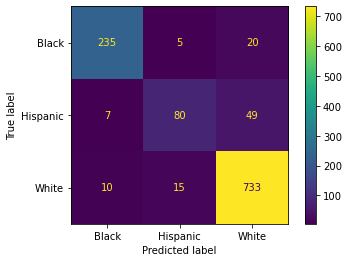

In [42]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)

In [43]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [44]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[235   5  20]
 [  7  80  49]
 [ 10  15 733]]
              precision    recall  f1-score   support

       Black       0.93      0.90      0.92       260
    Hispanic       0.80      0.59      0.68       136
       White       0.91      0.97      0.94       758

    accuracy                           0.91      1154
   macro avg       0.88      0.82      0.85      1154
weighted avg       0.90      0.91      0.90      1154


Train_Set
[[ 940   24   74]
 [  33  306  204]
 [  24   57 2953]]
              precision    recall  f1-score   support

       Black       0.94      0.91      0.92      1038
    Hispanic       0.79      0.56      0.66       543
       White       0.91      0.97      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.88      0.81      0.84      4615
weighted avg       0.91      0.91      0.90      4615



In [45]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [46]:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

In [47]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


operations = [("scaler", MinMaxScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.757655
train_precision_Hispanic    0.791154
test_recall_Hispanic        0.537407
train_recall_Hispanic       0.564965
test_f1_Hispanic            0.627061
train_f1_Hispanic           0.659151
dtype: float64

In [48]:
y_pred=pipe_model.predict(X_test)
y_pred_proba = pipe_model.predict_proba(X_test)

test_data = pd.concat([X_test, y_test], axis=1)

test_data["pred"] = y_pred
test_data["pred_proba_White"] = y_pred_proba[:,0]
test_data["pred_proba_Black"] = y_pred_proba[:,1]
test_data["pred_proba_Hispanic"] = y_pred_proba[:,2]
test_data.sample(10)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,SubjectsBirthLocation_Virginia,SubjectsBirthLocation_Washington,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,SubjectsBirthLocation_Wyoming,DODRace,pred,pred_proba_White,pred_proba_Black,pred_proba_Hispanic
875,256,1341,307,215,1233,236,183,386,311,267,...,0,0,0,0,0,Hispanic,Hispanic,0.001888,0.888000,0.110113
4405,286,1275,289,238,1179,233,187,365,341,301,...,1,0,0,0,0,Black,Black,0.665207,0.159245,0.175549
4343,242,1280,314,212,1199,228,180,369,307,267,...,0,0,0,0,0,Black,Black,0.509277,0.153577,0.337146
3234,252,1460,347,232,1341,260,203,422,321,290,...,0,0,0,0,0,White,White,0.000532,0.040032,0.959436
3391,212,1387,311,200,1283,240,195,372,311,289,...,0,0,0,0,0,White,White,0.007907,0.021502,0.970592
4933,221,1290,315,215,1201,227,183,368,275,250,...,0,0,0,0,0,Black,Black,0.960199,0.019237,0.020564
1887,216,1501,339,241,1378,257,200,414,342,272,...,0,0,0,0,0,White,White,0.000908,0.002204,0.996888
1858,284,1453,352,224,1333,251,200,419,359,282,...,0,0,0,0,0,White,White,0.007202,0.068419,0.924379
67,313,1524,342,250,1404,276,207,447,381,300,...,0,0,0,0,0,White,White,0.000347,0.004595,0.995058
2328,260,1408,343,236,1311,264,211,419,444,268,...,0,0,0,0,0,Black,Black,0.989651,0.002250,0.008098


### Logistic Model GridsearchCV

In [49]:
operations = [("scaler", MinMaxScaler()), ("logistic", LogisticRegression(max_iter=5000))]

model = Pipeline(steps=operations)

In [50]:
recall_Hispanic= make_scorer(recall_score, average=None, labels=["Hispanic"])

In [51]:
#model.get_params()

In [52]:
param_grid = { 'logistic__penalty': ["l1","l2"],
                'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25]
             }

In [53]:
grid_model = GridSearchCV(model, param_grid, verbose=3, scoring=recall_Hispanic, refit=True,n_jobs=-1, return_train_score=True)

In [54]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [55]:
grid_model.best_params_

{'logistic__C': 16, 'logistic__penalty': 'l2'}

In [56]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression(C=16, max_iter=5000))])

In [57]:
y_pred = grid_model.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

In [58]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.581974
mean_train_score    0.621542
Name: 9, dtype: object

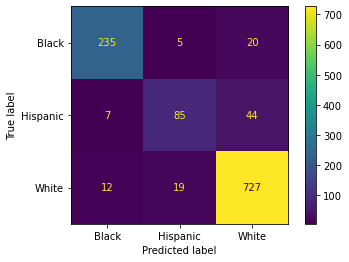

In [59]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

In [60]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[235   5  20]
 [  7  85  44]
 [ 12  19 727]]
              precision    recall  f1-score   support

       Black       0.93      0.90      0.91       260
    Hispanic       0.78      0.62      0.69       136
       White       0.92      0.96      0.94       758

    accuracy                           0.91      1154
   macro avg       0.87      0.83      0.85      1154
weighted avg       0.90      0.91      0.90      1154


Train_Set
[[ 965   22   51]
 [  31  332  180]
 [  24   67 2943]]
              precision    recall  f1-score   support

       Black       0.95      0.93      0.94      1038
    Hispanic       0.79      0.61      0.69       543
       White       0.93      0.97      0.95      3034

    accuracy                           0.92      4615
   macro avg       0.89      0.84      0.86      4615
weighted avg       0.92      0.92      0.92      4615



In [61]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

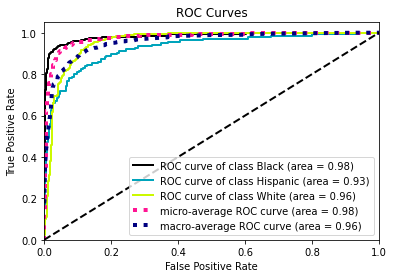

In [62]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=16,penalty='l2', max_iter=5000))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

In [63]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

roc_auc_score(y_test_dummies[:, 1], y_pred_proba[:, 1])  # roc_auc score  for setosa

0.9274890211487347

## 2. SVC

### Vanilla SVC model

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC())]
pipe_model = Pipeline(steps=operations)

In [66]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[225   4  31]
 [  7  56  73]
 [  6   5 747]]
              precision    recall  f1-score   support

       Black       0.95      0.87      0.90       260
    Hispanic       0.86      0.41      0.56       136
       White       0.88      0.99      0.93       758

    accuracy                           0.89      1154
   macro avg       0.89      0.75      0.80      1154
weighted avg       0.89      0.89      0.88      1154


Train_Set
[[ 928   15   95]
 [  38  208  297]
 [  12   19 3003]]
              precision    recall  f1-score   support

       Black       0.95      0.89      0.92      1038
    Hispanic       0.86      0.38      0.53       543
       White       0.88      0.99      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.90      0.76      0.79      4615
weighted avg       0.90      0.90      0.88      4615



In [67]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


operations = [("scaler", MinMaxScaler()), ("SVC", SVC())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.829728
train_precision_Hispanic    0.861187
test_recall_Hispanic        0.342222
train_recall_Hispanic       0.367297
test_f1_Hispanic            0.481024
train_f1_Hispanic           0.514892
dtype: float64

###  SVC Model GridsearchCV

In [68]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(max_iter=5000))]

model = Pipeline(steps=operations)

In [69]:
recall_Hispanic =  make_scorer( recall_score, average=None, labels=["Hispanic"] )

In [70]:
param_grid = {'SVC__gamma': ["scale", "auto", 1,0.1,0.01],
              'SVC__kernel': ['rbf'],
              'SVC__class_weight': ["balanced", None]}

In [71]:
grid_model = GridSearchCV(model, param_grid, verbose=3, scoring=recall_Hispanic, refit=True,n_jobs=-1, return_train_score=True)

In [72]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC', SVC(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 1, 0.1, 0.01],
                         'SVC__kernel': ['rbf']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [73]:
grid_model.best_params_

{'SVC__class_weight': 'balanced', 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}

In [74]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('SVC', SVC(class_weight='balanced', max_iter=5000))])

In [75]:
y_pred = grid_model.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

In [76]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.766004
mean_train_score    0.836545
Name: 0, dtype: object

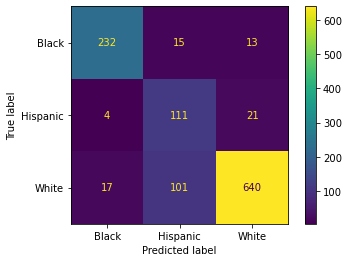

In [77]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [78]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[232  15  13]
 [  4 111  21]
 [ 17 101 640]]
              precision    recall  f1-score   support

       Black       0.92      0.89      0.90       260
    Hispanic       0.49      0.82      0.61       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.79      0.85      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 950   52   36]
 [  22  449   72]
 [  52  393 2589]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.83      0.62       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



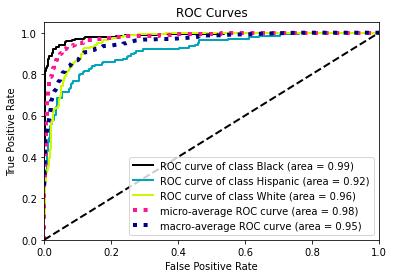

In [79]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("scaler", MinMaxScaler()), ("SVC", SVC(class_weight='balanced', gamma='scale', kernel='rbf', probability=True, max_iter=5000))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

In [80]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

roc_auc_score(y_test_dummies[:, 1], y_pred_proba[:, 1])  # roc_auc score  for setosa

0.9162140298162487

## 3. RF

### Vanilla RF Model

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

cat = X_train.select_dtypes("object").columns

ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

In [83]:
operations = [("OrdinalEncoder", column_trans),("scaler", MinMaxScaler()), ("RF_model", RandomForestClassifier())]
pipe_model = Pipeline(steps=operations)

In [84]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[203   4  53]
 [ 13  33  90]
 [ 13   3 742]]
              precision    recall  f1-score   support

       Black       0.89      0.78      0.83       260
    Hispanic       0.82      0.24      0.38       136
       White       0.84      0.98      0.90       758

    accuracy                           0.85      1154
   macro avg       0.85      0.67      0.70      1154
weighted avg       0.85      0.85      0.82      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [85]:
scores = cross_validate(pipe_model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.784593
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.180269
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.290809
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [86]:
recall_Hispanic =  make_scorer( recall_score, average=None, labels=["Hispanic"] )

In [87]:
param_grid = {'RF_model__n_estimators':[100,200,300],
             'RF_model__criterion': ["gini","entropy"],
             'RF_model__max_depth':[10,12,14,16]}

In [88]:
grid_model = GridSearchCV(pipe_model, param_grid, verbose=3, scoring=recall_Hispanic, refit=True,n_jobs=-1, return_train_score=True)

In [89]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index([], dtype='object'))])),
                                       ('scaler', MinMaxScaler()),
                                       ('RF_model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['gini', 'entropy'],
                         'RF_model__max_depth': [10, 12, 14, 16],
                         'RF_model__n_estimators': [100, 200, 300]},
             return_train_score=True,
             scorin

In [90]:
grid_model.best_params_

{'RF_model__criterion': 'gini',
 'RF_model__max_depth': 16,
 'RF_model__n_estimators': 300}

In [91]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index([], dtype='object'))])),
                ('scaler', MinMaxScaler()),
                ('RF_model',
                 RandomForestClassifier(max_depth=16, n_estimators=300))])

In [92]:
y_pred = grid_model.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

In [93]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.189636
mean_train_score    0.921724
Name: 11, dtype: object

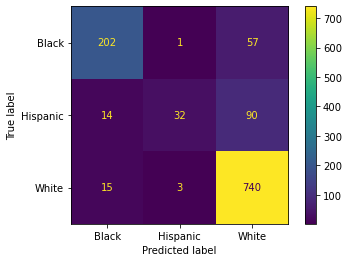

In [94]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [95]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[202   1  57]
 [ 14  32  90]
 [ 15   3 740]]
              precision    recall  f1-score   support

       Black       0.87      0.78      0.82       260
    Hispanic       0.89      0.24      0.37       136
       White       0.83      0.98      0.90       758

    accuracy                           0.84      1154
   macro avg       0.87      0.66      0.70      1154
weighted avg       0.85      0.84      0.82      1154


Train_Set
[[1033    0    5]
 [   0  490   53]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      0.90      0.95       543
       White       0.98      1.00      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.99      0.97      0.98      4615
weighted avg       0.99      0.99      0.99      4615



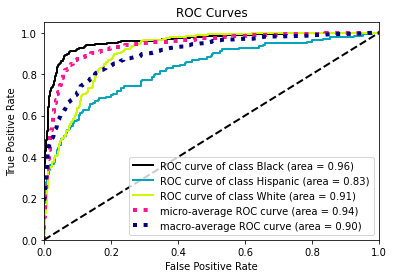

In [96]:
operations = [("OrdinalEncoder", column_trans),("scaler", MinMaxScaler()), ('RF_model',
                 RandomForestClassifier(max_depth=16, n_estimators=300, criterion= 'gini'))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

In [97]:
y_test_dummies = pd.get_dummies(y_test).values

roc_auc_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.8274009014214724

## 4. XGBoost

### Vanilla XGBoost Model

In [98]:
#pip install xgboost==1.7.3

In [99]:
from xgboost import XGBClassifier

In [100]:
operations = [("OrdinalEncoder", column_trans),("scaler", MinMaxScaler()), ("XGB_model",XGBClassifier())]
pipe_model_xgb = Pipeline(steps=operations)
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})

In [101]:
#y_train_xgb

In [102]:
pipe_model_xgb.fit(X_train, y_train_xgb)
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[225   5  30]
 [ 10  61  65]
 [ 16   6 736]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       260
           1       0.85      0.45      0.59       136
           2       0.89      0.97      0.93       758

    accuracy                           0.89      1154
   macro avg       0.88      0.76      0.80      1154
weighted avg       0.88      0.89      0.88      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [103]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [104]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

,weights,label
938,2.833026,1
206,0.507031,2
3996,0.507031,2
3360,0.507031,2
4714,1.482017,0


In [105]:
pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index([], dtype='object'))])),
                ('scaler', MinMaxScaler()),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               col...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
      

In [106]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[230   7  23]
 [ 13  71  52]
 [ 18  21 719]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       260
           1       0.72      0.52      0.60       136
           2       0.91      0.95      0.93       758

    accuracy                           0.88      1154
   macro avg       0.83      0.79      0.80      1154
weighted avg       0.88      0.88      0.88      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [107]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

In [108]:
scores = cross_validate(
    pipe_model_xgb,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.737185
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.506371
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.599221
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [109]:
recall_Hispanic =  make_scorer( recall_score, average=None, labels=[1] )

In [110]:
param_grid = {"XGB_model__n_estimators":[100, 300],
              'XGB_model__max_depth':[3,5,6],
              "XGB_model__learning_rate": [0.1, 0.3]}

In [111]:
grid_model = GridSearchCV(pipe_model_xgb, param_grid, verbose=3, scoring=recall_Hispanic, refit=True,n_jobs=-1, return_train_score=True)

In [112]:
grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index([], dtype='object'))])),
                                       ('scaler', MinMaxScaler()),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                          

In [113]:
grid_model.best_params_

{'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 100}

In [114]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index([], dtype='object'))])),
                ('scaler', MinMaxScaler()),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               col...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
       

In [115]:
y_pred = grid_model.predict(X_test)
y_pred

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

In [116]:
pd.DataFrame(grid_model.cv_results_).loc[
    grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.668468
mean_train_score    0.866484
Name: 0, dtype: object

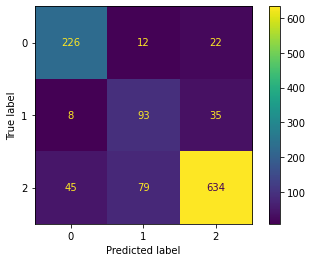

In [117]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test_xgb)

In [118]:
eval_metric(grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[226  12  22]
 [  8  93  35]
 [ 45  79 634]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       260
           1       0.51      0.68      0.58       136
           2       0.92      0.84      0.88       758

    accuracy                           0.83      1154
   macro avg       0.74      0.80      0.76      1154
weighted avg       0.84      0.83      0.83      1154


Train_Set
[[ 972   29   37]
 [  14  460   69]
 [  85  275 2674]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1038
           1       0.60      0.85      0.70       543
           2       0.96      0.88      0.92      3034

    accuracy                           0.89      4615
   macro avg       0.82      0.89      0.85      4615
weighted avg       0.91      0.89      0.89      4615



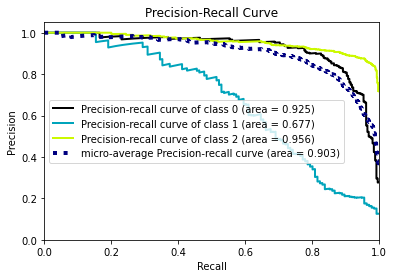

In [119]:
operations = [("OrdinalEncoder", column_trans),("scaler", MinMaxScaler()), ('XGB_model',
                 XGBClassifier( max_depth=3, n_estimators=100, learning_rate=0.1))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [120]:
y_test_dummies = pd.get_dummies(y_test_xgb).values

roc_auc_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.881883450826303

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [112]:
!pip install imblearn

In [121]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [126]:
from sklearn.preprocessing import OneHotEncoder
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler(),
)

In [127]:
X_train_ohe = column_trans.fit_transform(X_train)

In [128]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)

In [129]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [165]:
over = SMOTE(sampling_strategy={"Hispanic": 800})
under = RandomUnderSampler(sampling_strategy={"White": 2000})

In [166]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [167]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [168]:
steps = [("o", over), ("u", under)]


pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

## Logistic Regression Over/ Under Sampling

In [169]:
operations = [("OneHotEncoder", column_trans), ("o", over),
    ("u", under), ("logistic", LogisticRegression())]

smote_pipeline = Pipeline(steps=operations)

In [170]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index([], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 800})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2000})),
                ('logistic', LogisticRegression())])

In [171]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[235  11  14]
 [  6  92  38]
 [ 15  37 706]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       260
    Hispanic       0.66      0.68      0.67       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.84      0.84      0.84      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 949   36   53]
 [  32  377  134]
 [  38  141 2855]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92      1038
    Hispanic       0.68      0.69      0.69       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.85      0.85      0.85      4615
weighted avg       0.91      0.91      0.91      4615



## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [173]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(),
    ),
]

final_model = Pipeline(steps=operations_final)

In [174]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index([], dtype='object'))])),
                ('log', LogisticRegression())])

In [175]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.8275307744021819

In [176]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.8249143862126194

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___